# MyFitnessPal Test
## Marshall Ferguson - 12/2021

In [1]:
# Imports

import pandas as pd

In [2]:
# Import Data

df = pd.read_csv(r'..\test_data\MyFitnessPal_Test_Data.csv')

df.head()

,Date,Meal,Calories,Fat (g),Saturated Fat,Polyunsaturated Fat,Monounsaturated Fat,Trans Fat,Cholesterol,Sodium (mg),Potassium,Carbohydrates (g),Fiber,Sugar,Protein (g),Vitamin A,Vitamin C,Calcium,Iron,Note
0,2019-06-07,Meal 1,430.0,12.0,2.5,3.0,6.0,0.0,345.0,415.0,375.0,35.0,2.0,21.0,42.0,0.0,0.0,73.0,18.0,NaN
1,2019-06-07,Meal 2,480.0,24.0,7.1,1.9,8.5,0.0,90.0,750.3,503.8,37.4,11.0,3.5,31.5,13.5,16.0,25.8,16.3,NaN
2,2019-06-07,Meal 3,315.0,3.3,0.8,0.0,0.0,0.0,97.5,135.0,0.0,33.0,2.0,0.0,41.5,3.0,3.0,0.0,8.0,NaN
3,2019-06-07,Meal 4,935.0,24.4,8.6,1.1,3.0,0.0,235.0,1343.7,742.4,114.5,19.1,40.4,92.3,111.5,38.3,165.9,27.8,NaN
4,2019-06-08,Meal 4,230.0,7.5,2.0,0.5,1.5,0.0,0.0,330.0,390.0,16.0,1.0,2.0,23.0,10.0,0.0,49.0,4.0,NaN


For now, let's just focus on a few of the columns in the DataFrame rather than the entire thing. For this test analysis, we will focus  Date, Meal, Calories, and the three macronutrients.

In [5]:
vars_of_interest = ['Date', 'Meal', 'Calories', 'Fat (g)', 'Carbohydrates (g)', 'Protein (g)'] 

df = df.filter(vars_of_interest, axis=1)

df.head()

,Date,Meal,Calories,Fat (g),Carbohydrates (g),Protein (g)
0,2019-06-07,Meal 1,430.0,12.0,35.0,42.0
1,2019-06-07,Meal 2,480.0,24.0,37.4,31.5
2,2019-06-07,Meal 3,315.0,3.3,33.0,41.5
3,2019-06-07,Meal 4,935.0,24.4,114.5,92.3
4,2019-06-08,Meal 4,230.0,7.5,16.0,23.0


In [6]:
df_group_date = df.groupby('Date').sum()

df_group_date

,Calories,Fat (g),Carbohydrates (g),Protein (g)
Date,,,,
2019-06-07,2160.0,63.7,219.9,207.3
2019-06-08,230.0,7.5,16.0,23.0
2019-06-09,2221.5,84.9,154.9,208.8
2019-06-10,2270.4,93.8,172.1,186.0
2019-06-11,1722.0,73.3,137.0,133.4
...,...,...,...,...
2021-11-27,480.0,15.9,38.5,46.3
2021-11-28,1934.1,80.8,177.3,174.3
2021-11-29,2065.6,62.5,199.7,191.1


In [7]:
df_group_date = df_group_date.reset_index()

df_group_date

,Date,Calories,Fat (g),Carbohydrates (g),Protein (g)
0,2019-06-07,2160.0,63.7,219.9,207.3
1,2019-06-08,230.0,7.5,16.0,23.0
2,2019-06-09,2221.5,84.9,154.9,208.8
3,2019-06-10,2270.4,93.8,172.1,186.0
4,2019-06-11,1722.0,73.3,137.0,133.4
...,...,...,...,...,...
229,2021-11-27,480.0,15.9,38.5,46.3
230,2021-11-28,1934.1,80.8,177.3,174.3
231,2021-11-29,2065.6,62.5,199.7,191.1
232,2021-11-30,2569.0,89.9,267.2,198.2


Since some of the data is incomplete, let's sort out the rows that have less than 1000 calories logged in a day and remove them.

In [9]:
df_group_date = df_group_date.where(df_group_date['Calories'] > 1000)

df_group_date.head()

,Date,Calories,Fat (g),Carbohydrates (g),Protein (g)
0,2019-06-07,2160.0,63.7,219.9,207.3
1,NaN,NaN,NaN,NaN,NaN
2,2019-06-09,2221.5,84.9,154.9,208.8
3,2019-06-10,2270.4,93.8,172.1,186.0
4,2019-06-11,1722.0,73.3,137.0,133.4


In [10]:
df_group_date = df_group_date.dropna(how='all')

df_group_date.head()

,Date,Calories,Fat (g),Carbohydrates (g),Protein (g)
0,2019-06-07,2160.0,63.7,219.9,207.3
2,2019-06-09,2221.5,84.9,154.9,208.8
3,2019-06-10,2270.4,93.8,172.1,186.0
4,2019-06-11,1722.0,73.3,137.0,133.4
5,2019-06-12,1420.0,63.5,115.0,109.0


<AxesSubplot:xlabel='Date', ylabel='Calories'>

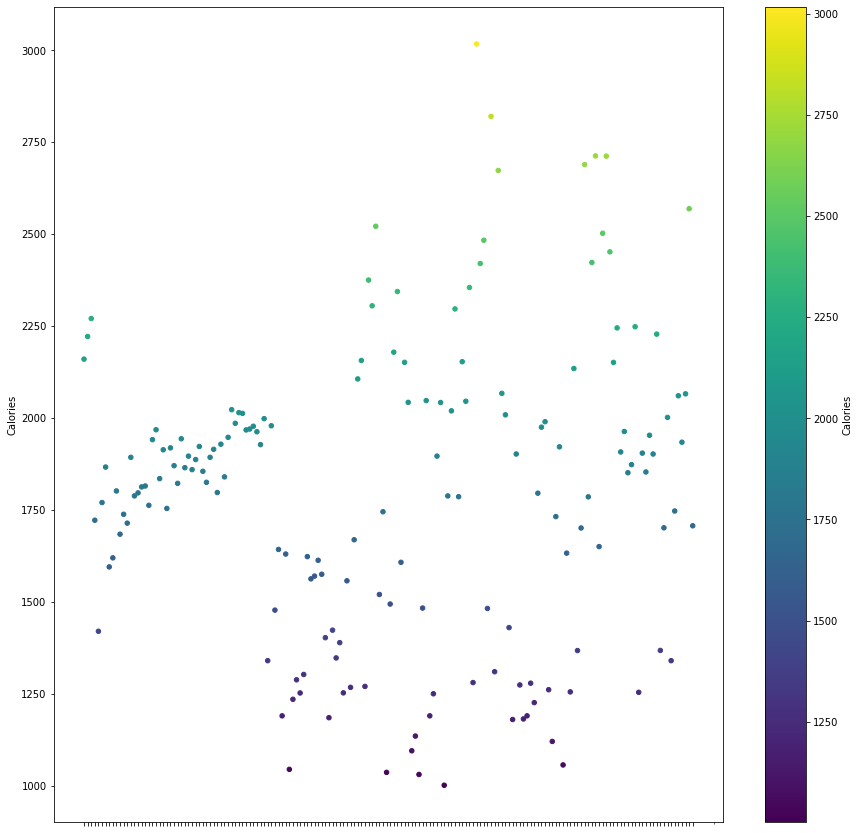

In [20]:
df_group_date.plot.scatter(x='Date', y='Calories', c='Calories', colormap='viridis', figsize=[15,15])

After some reflection, I think the nutrition data by itself will not be all the insightful. I am thinking I should combine the nutrition data with the weight/scale data and see what that looks like.